In [115]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import os
import warnings
warnings.filterwarnings('ignore')

In [116]:
data=pd.read_csv("F:\HR PREDICTION\\WA_Fn-UseC_-HR-Employee-Attrition.csv")   # load the dataset

In [117]:
data.head(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,4,Male,79,3,1,Laboratory Technician,4,Single,3068,11864,0,Y,No,13,3,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,3,Female,81,4,1,Laboratory Technician,1,Married,2670,9964,4,Y,Yes,20,4,1,80,3,12,3,2,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,4,Male,67,3,1,Laboratory Technician,3,Divorced,2693,13335,1,Y,No,22,4,2,80,1,1,2,3,1,0,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,4,Male,44,2,3,Manufacturing Director,3,Single,9526,8787,0,Y,No,21,4,2,80,0,10,2,3,9,7,1,8
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,3,Male,94,3,2,Healthcare Representative,3,Married,5237,16577,6,Y,No,13,3,2,80,2,17,3,2,7,7,7,7


In [118]:
data.info()   # Getting information about dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [119]:
data.describe()   # Describe the dataset

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [120]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [121]:
data.drop

<bound method DataFrame.drop of       Age Attrition     BusinessTravel  DailyRate              Department  \
0      41       Yes      Travel_Rarely       1102                   Sales   
1      49        No  Travel_Frequently        279  Research & Development   
2      37       Yes      Travel_Rarely       1373  Research & Development   
3      33        No  Travel_Frequently       1392  Research & Development   
4      27        No      Travel_Rarely        591  Research & Development   
...   ...       ...                ...        ...                     ...   
1465   36        No  Travel_Frequently        884  Research & Development   
1466   39        No      Travel_Rarely        613  Research & Development   
1467   27        No      Travel_Rarely        155  Research & Development   
1468   49        No  Travel_Frequently       1023                   Sales   
1469   34        No      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education Education

{'whiskers': [<matplotlib.lines.Line2D at 0x229c24d1490>,
 'caps': [<matplotlib.lines.Line2D at 0x229c24d1a30>,
 'boxes': [<matplotlib.lines.Line2D at 0x229c24d1190>],
 'medians': [<matplotlib.lines.Line2D at 0x229c24d1fd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x229c24dc2e0>],
 'means': []}

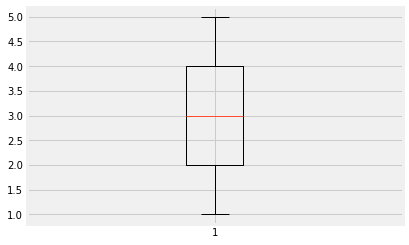

In [122]:
plt.boxplot(data.Education)

In [123]:
# Counting information about dataset
data.value_counts()

Age  Attrition  BusinessTravel  DailyRate  Department              DistanceFromHome  Education  EducationField    EmployeeCount  EmployeeNumber  EnvironmentSatisfaction  Gender  HourlyRate  JobInvolvement  JobLevel  JobRole                JobSatisfaction  MaritalStatus  MonthlyIncome  MonthlyRate  NumCompaniesWorked  Over18  OverTime  PercentSalaryHike  PerformanceRating  RelationshipSatisfaction  StandardHours  StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager
18   No         Non-Travel      287        Research & Development  5                 2          Life Sciences     1              1012            2                        Male    73          3               1         Research Scientist     4                Single         1051           13493        1                   Y       No        15                 3                  4                         80             0        

In [124]:
train_data = pd.read_csv("F:\HR PREDICTION\\WA_Fn-UseC_-HR-Employee-Attrition.csv")
test_data = pd.read_csv("F:\HR PREDICTION\\WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [125]:
train_data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [126]:
train_data.shape

(1470, 35)

In [127]:
test_data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [128]:
test_data.shape

(1470, 35)

In [129]:
train_data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [130]:
test_data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

<h1>Correleation Map</h1>

<AxesSubplot:>

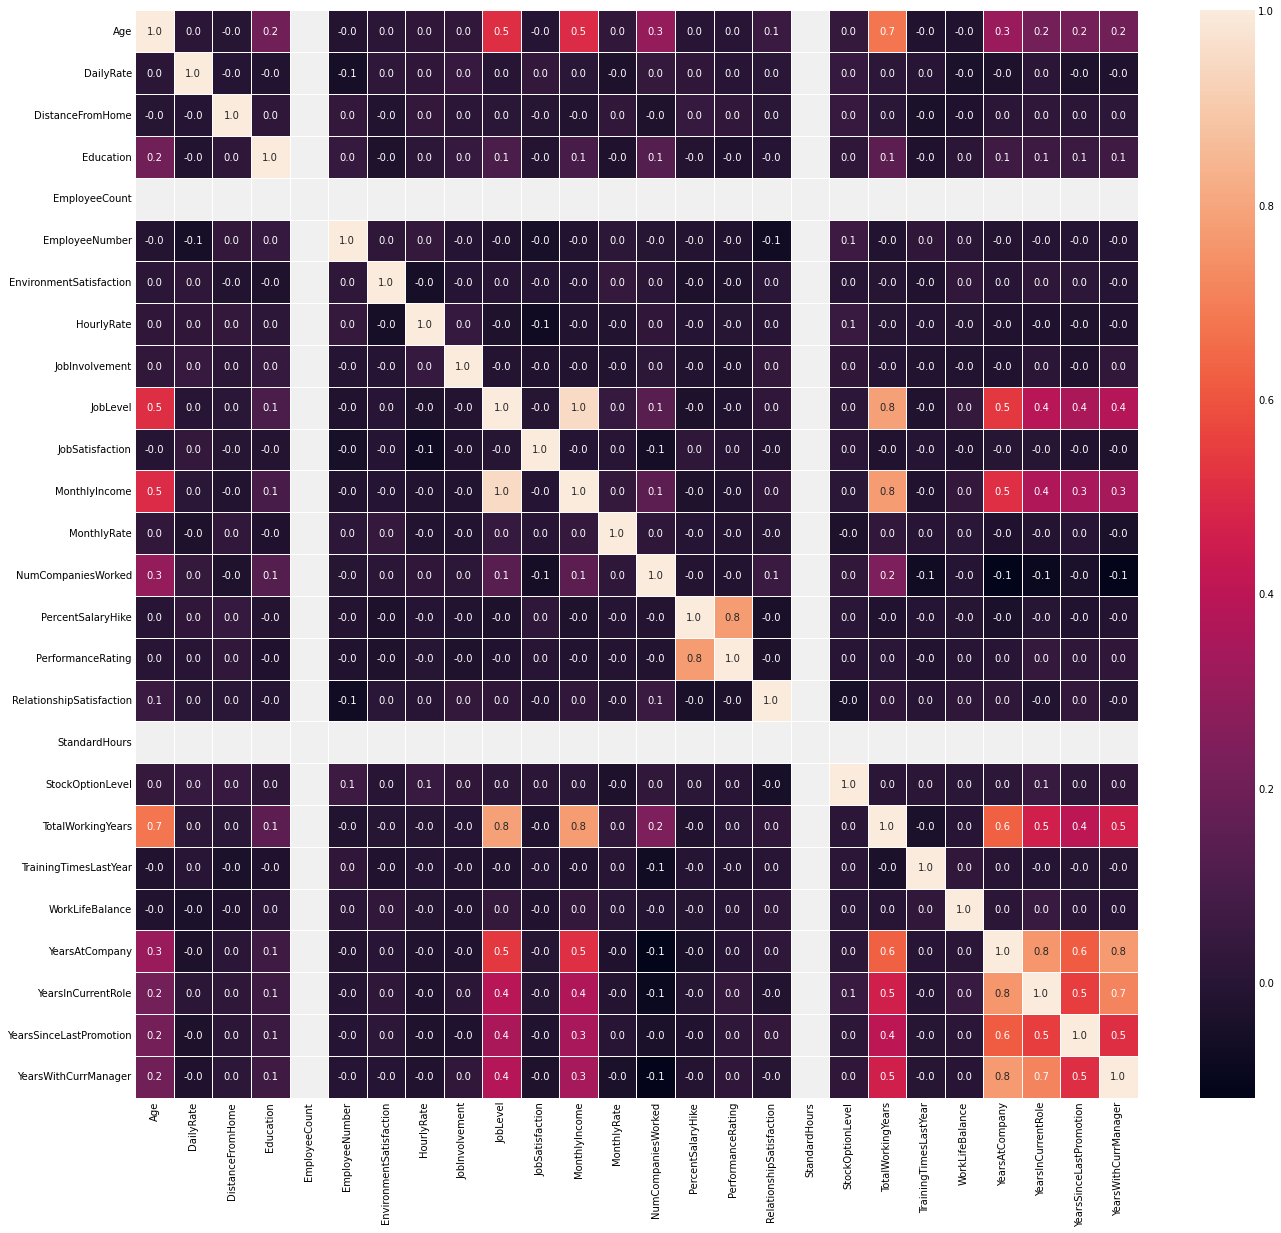

In [131]:

# Plot a correlation map for all numeric variables

f,ax=plt.subplots(figsize=(20,20))
sns.heatmap(data.corr(),annot=True,linewidths=0.5,fmt='.1f',ax=ax)

<h1> Count of people based on their field of education<h1>

Text(0.5, 1.0, 'Education Field')

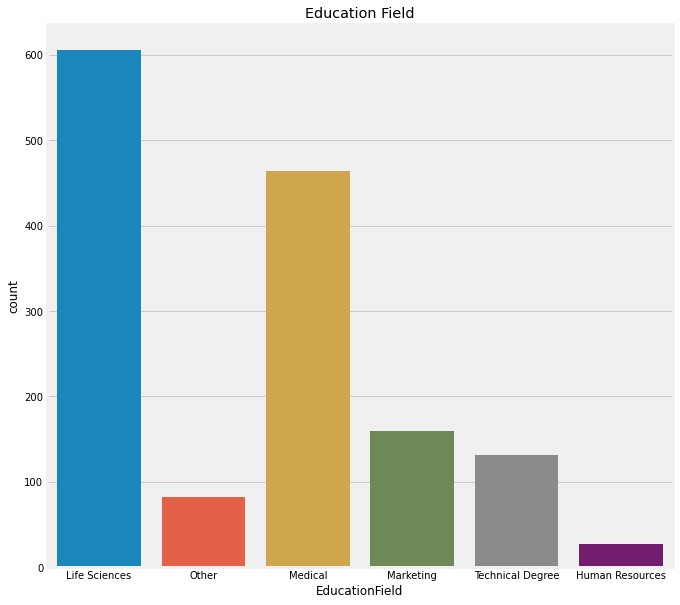

In [132]:
#count of people based on their field of education

sns.countplot(data['EducationField'])
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.title('Education Field')

<h1> Count of people based on the department in which they work <h1>

Text(0.5, 1.0, 'Department')

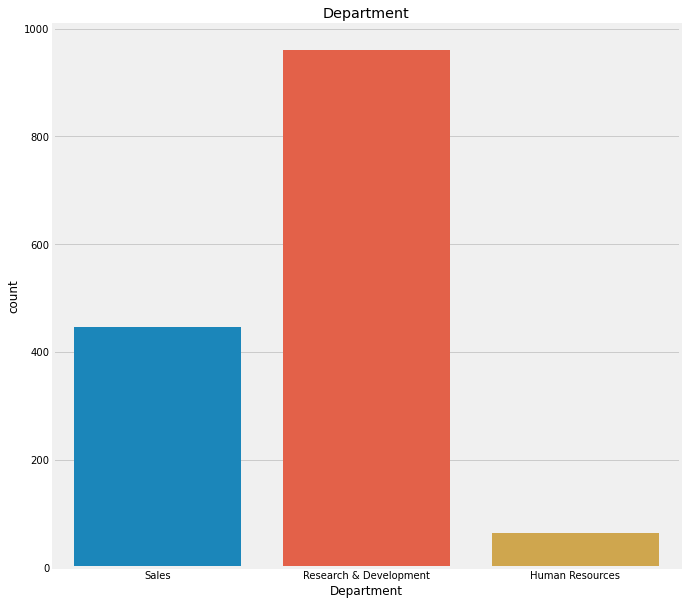

In [133]:
#count of people based on the department in which they work

sns.countplot(data['Department'])
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.title('Department')

<h1> Count of people based on their Travel Frequency</h1>


Text(0.5, 1.0, 'Business travel')

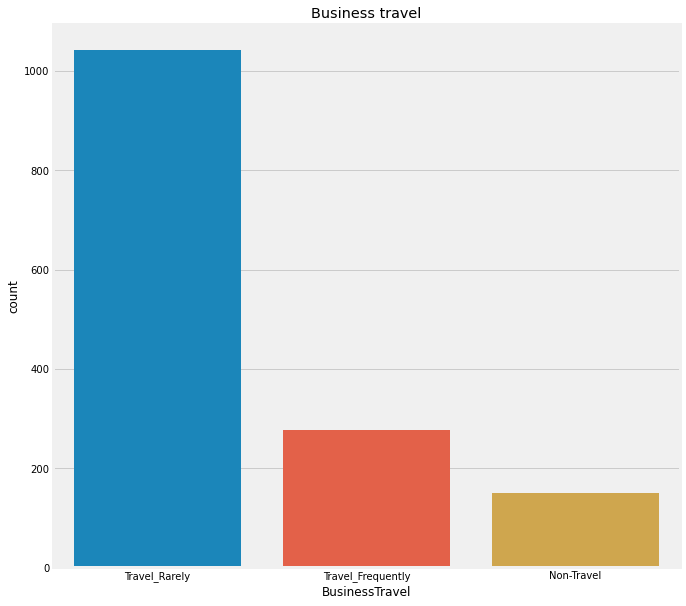

In [134]:
#count of people based on their Travel Frequency

sns.countplot(data['BusinessTravel'])
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.title('Business travel')

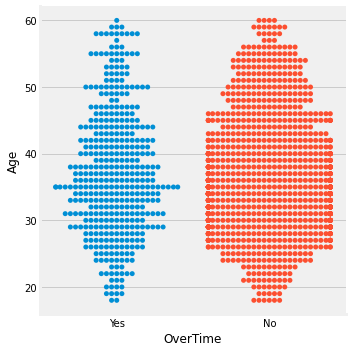

In [135]:
# analyzing the age group of the people doing overtime

sns.catplot(x="OverTime", y="Age", kind="swarm", data=data);

<AxesSubplot:xlabel='TotalWorkingYears', ylabel='count'>

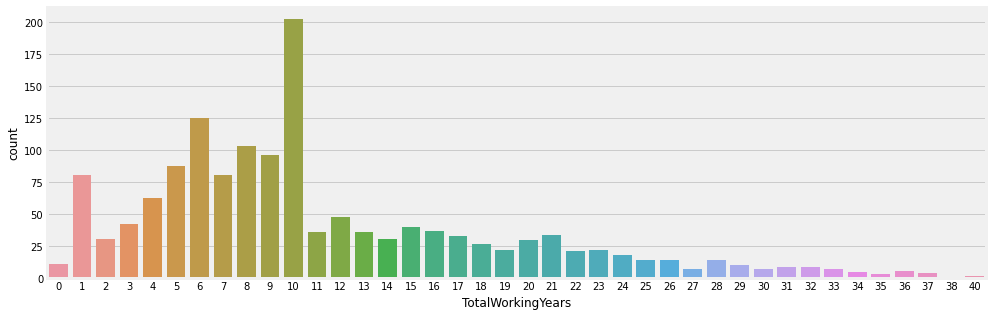

In [136]:
#count of people based on their total working years

plt.subplots(figsize=(15,5))
sns.countplot(data.TotalWorkingYears)

<AxesSubplot:xlabel='NumCompaniesWorked', ylabel='count'>

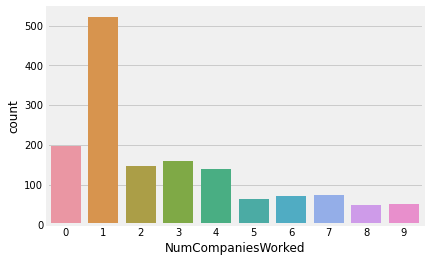

In [137]:
#count of people based on the number of companies they have worked for

sns.countplot(data.NumCompaniesWorked)

<AxesSubplot:xlabel='DistanceFromHome', ylabel='count'>

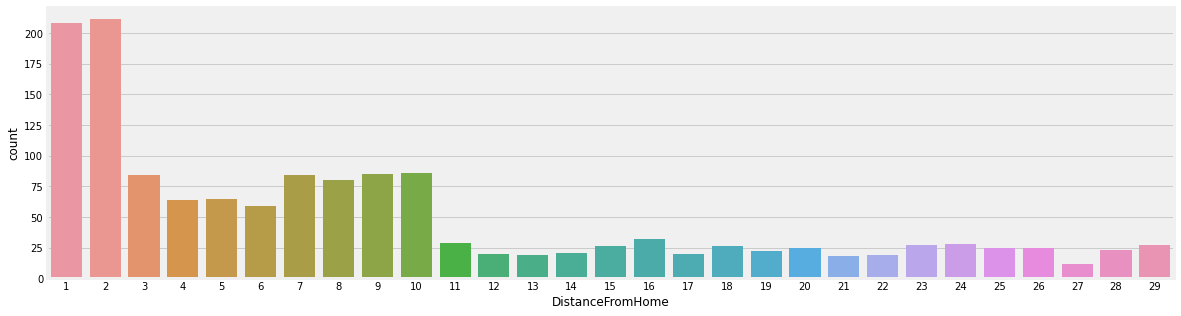

In [138]:
#count of people based on the distance from home they are working

plt.subplots(figsize=(18,5))
sns.countplot(data.DistanceFromHome)

In [139]:
pip install hyperopt

Note: you may need to restart the kernel to use updated packages.


In [140]:
pip install catboost

Note: you may need to restart the kernel to use updated packages.


In [141]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [142]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [143]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [144]:
# necessary imports
import time
import math
import seaborn as sns
import pandas as pd
import numpy as np
import scipy as sci
import plotly.offline as py
import plotly.graph_objs as go
py.init_notebook_mode(connected=True)

from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from hyperopt import hp, tpe, Trials, STATUS_OK
from hyperopt import fmin

from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.model_selection import train_test_split

from matplotlib import pyplot as plt
plt.style.use('fivethirtyeight') 
%matplotlib inline

In [145]:
ibm_df = data     # copying data to ibm_df
ibm_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [146]:
description = pd.DataFrame(index=['observations(rows)', 'percent missing', 'dtype', 'range']) # creating a dataframe with custom indices

In [147]:
# initializing empty lists
numerical = []
categorical = []


for col in ibm_df.columns:
    obs = ibm_df[col].size
    p_nan = round(ibm_df[col].isna().sum()/obs, 2) # caluclating the number of missing values
    num_nan = f'{p_nan}% ({ibm_df[col].isna().sum()}/{obs})' # caluclating the number of missing values
    dtype = 'categorical' if ibm_df[col].dtype == object else 'numerical' # defining the criteria for numerical and categorical columns
    numerical.append(col) if dtype == 'numerical' else categorical.append(col) # preparing the list of categorcal and numerical columns
    rng = f'{len(ibm_df[col].unique())} labels' if dtype == 'categorical' else f'{ibm_df[col].min()}-{ibm_df[col].max()}' # the range of values in the columns
    description[col] = [obs, num_nan, dtype, rng]

In [148]:
numerical.remove('EmployeeCount') # removing EmployeeCount from numerical columns
numerical.remove('StandardHours') # removing StandardHours from numerical columns
pd.set_option('display.max_columns', 100) # displaying 100 columns atmost
display(description)
display(ibm_df.head())

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
observations(rows),1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470
percent missing,0.0% (0/1470),0.0% (0/1470),0.0% (0/1470),0.0% (0/1470),0.0% (0/1470),0.0% (0/1470),0.0% (0/1470),0.0% (0/1470),0.0% (0/1470),0.0% (0/1470),0.0% (0/1470),0.0% (0/1470),0.0% (0/1470),0.0% (0/1470),0.0% (0/1470),0.0% (0/1470),0.0% (0/1470),0.0% (0/1470),0.0% (0/1470),0.0% (0/1470),0.0% (0/1470),0.0% (0/1470),0.0% (0/1470),0.0% (0/1470),0.0% (0/1470),0.0% (0/1470),0.0% (0/1470),0.0% (0/1470),0.0% (0/1470),0.0% (0/1470),0.0% (0/1470),0.0% (0/1470),0.0% (0/1470),0.0% (0/1470),0.0% (0/1470)
dtype,numerical,categorical,categorical,numerical,categorical,numerical,numerical,categorical,numerical,numerical,numerical,categorical,numerical,numerical,numerical,categorical,numerical,categorical,numerical,numerical,numerical,categorical,categorical,numerical,numerical,numerical,numerical,numerical,numerical,numerical,numerical,numerical,numerical,numerical,numerical
range,18-60,2 labels,3 labels,102-1499,3 labels,1-29,1-5,6 labels,1-1,1-2068,1-4,2 labels,30-100,1-4,1-5,9 labels,1-4,3 labels,1009-19999,2094-26999,0-9,1 labels,2 labels,11-25,3-4,1-4,80-80,0-3,0-40,0-6,1-4,0-40,0-18,0-15,0-17


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [149]:
# defining a method for calculating accuracy,search time, hyperparameters etc for different models
def org_results(trials, hyperparams, model_name):
    fit_idx = -1
    for idx, fit  in enumerate(trials):
        hyp = fit['misc']['vals']
        xgb_hyp = {key:[val] for key, val in hyperparams.items()}
        if hyp == xgb_hyp:
            fit_idx = idx
            break
            
    train_time = str(trials[-1]['refresh_time'] - trials[0]['book_time'])
    acc = round(trials[fit_idx]['result']['accuracy'], 3)
    train_auc = round(trials[fit_idx]['result']['train auc'], 3)
    test_auc = round(trials[fit_idx]['result']['test auc'], 3)

    results = {
        'model': model_name,
        'parameter search time': train_time,
        'accuracy': acc,
        'test auc score': test_auc,
        'training auc score': train_auc,
        'parameters': hyperparams
    }
    return results

In [150]:
lgb_data = ibm_df.copy()
lgb_data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [151]:
lgb_dummy = pd.get_dummies(lgb_data[categorical], drop_first=True) # creating dummy values for categoriccal columns
lgb_dummy.head()

,Attrition_Yes,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1
1,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0
2,1,0,1,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,1
3,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1
4,0,0,1,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0


In [152]:
lgb_data = pd.concat([lgb_dummy, lgb_data], axis=1) # concatenating dummy columns to the original dataframe
lgb_data.head()

,Attrition_Yes,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,1,0,1,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,1,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,0,0,1,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [153]:
lgb_data.drop(columns = categorical, inplace=True) # dropping the old categorical columns
lgb_data.head()

,Attrition_Yes,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,41,1102,1,2,1,1,2,94,3,2,4,5993,19479,8,11,3,1,80,0,8,0,1,6,4,0,5
1,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,49,279,8,1,1,2,3,61,2,2,2,5130,24907,1,23,4,4,80,1,10,3,3,10,7,1,7
2,1,0,1,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,1,37,1373,2,2,1,4,4,92,2,1,3,2090,2396,6,15,3,2,80,0,7,3,3,0,0,0,0
3,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,33,1392,3,4,1,5,4,56,3,1,3,2909,23159,1,11,3,3,80,0,8,3,3,8,7,3,0
4,0,0,1,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,27,591,2,1,1,7,1,40,3,1,2,3468,16632,9,12,3,4,80,1,6,3,3,2,2,2,2


In [154]:
lgb_data.rename(columns={'Attrition_Yes': 'Attrition'}, inplace=True) # renaming the column
lgb_data.head()

,Attrition,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,41,1102,1,2,1,1,2,94,3,2,4,5993,19479,8,11,3,1,80,0,8,0,1,6,4,0,5
1,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,49,279,8,1,1,2,3,61,2,2,2,5130,24907,1,23,4,4,80,1,10,3,3,10,7,1,7
2,1,0,1,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,1,37,1373,2,2,1,4,4,92,2,1,3,2090,2396,6,15,3,2,80,0,7,3,3,0,0,0,0
3,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,33,1392,3,4,1,5,4,56,3,1,3,2909,23159,1,11,3,3,80,0,8,3,3,8,7,3,0
4,0,0,1,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,27,591,2,1,1,7,1,40,3,1,2,3468,16632,9,12,3,4,80,1,6,3,3,2,2,2,2


In [155]:
y_df = lgb_data['Attrition'].reset_index(drop=True) #  creating the label column
display(y_df.head())

0    1
1    0
2    1
3    0
4    0
Name: Attrition, dtype: uint8

In [156]:
x_df = lgb_data.drop(columns='Attrition') # selecting the feature columns
x_df.head()

,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,41,1102,1,2,1,1,2,94,3,2,4,5993,19479,8,11,3,1,80,0,8,0,1,6,4,0,5
1,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,49,279,8,1,1,2,3,61,2,2,2,5130,24907,1,23,4,4,80,1,10,3,3,10,7,1,7
2,0,1,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,1,37,1373,2,2,1,4,4,92,2,1,3,2090,2396,6,15,3,2,80,0,7,3,3,0,0,0,0
3,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,33,1392,3,4,1,5,4,56,3,1,3,2909,23159,1,11,3,3,80,0,8,3,3,8,7,3,0
4,0,1,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,27,591,2,1,1,7,1,40,3,1,2,3468,16632,9,12,3,4,80,1,6,3,3,2,2,2,2


In [157]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(x_df, y_df, test_size=0.20) # splitting the training and test data

In [158]:
print('Sample Training Data')
display(train_x.head())
print('Sample Test Data')
display(test_x.head())

Sample Training Data


,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
266,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,31,1463,23,3,1,367,2,64,2,2,4,5582,14408,0,21,4,2,80,1,10,2,3,9,0,7,8
149,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,19,1181,3,1,1,201,2,79,3,1,2,1483,16102,1,14,3,4,80,0,1,3,3,1,0,0,0
399,0,1,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,31,329,1,2,1,530,4,98,2,1,1,2218,16193,1,12,3,3,80,1,4,3,3,4,2,3,2
851,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,56,718,4,4,1,1191,4,92,3,5,1,19943,18575,4,13,3,4,80,1,28,2,3,5,2,4,2
230,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,52,1323,2,3,1,316,3,89,2,1,4,3212,3300,7,15,3,2,80,0,6,3,2,2,2,2,2


Sample Test Data


,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1183,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,36,1040,3,2,1,1664,4,79,4,2,1,6842,26308,6,20,4,1,80,1,13,3,3,5,4,0,4
1178,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,20,1141,2,3,1,1657,3,31,3,1,3,2783,13251,1,19,3,1,80,0,2,3,3,2,2,2,2
473,0,1,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,49,1245,18,4,1,638,4,58,2,5,3,19502,2125,1,17,3,3,80,1,31,5,3,31,9,0,9
903,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,29,1329,7,3,1,1260,3,82,3,2,4,6623,4204,1,11,3,2,80,2,6,2,3,6,0,1,0
1243,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,45,176,4,3,1,1744,3,56,1,3,3,9756,6595,4,21,4,3,80,2,9,2,4,5,0,0,3


In [159]:
print('Sample Training Labels')
display(train_y.head())
print('Sample Test Labels')
display(test_y.head())

Sample Training Labels


266    0
149    0
399    0
851    0
230    0
Name: Attrition, dtype: uint8

Sample Test Labels


1183    0
1178    0
473     0
903     0
1243    0
Name: Attrition, dtype: uint8

In [160]:
# creating a dataframe that shows values based on grouping by age
age=pd.DataFrame(data.groupby("Age")[["MonthlyIncome","Education","JobLevel","JobInvolvement","PerformanceRating","JobSatisfaction","EnvironmentSatisfaction","RelationshipSatisfaction","WorkLifeBalance","DailyRate","MonthlyRate"]].mean())
age.head()

,MonthlyIncome,Education,JobLevel,JobInvolvement,PerformanceRating,JobSatisfaction,EnvironmentSatisfaction,RelationshipSatisfaction,WorkLifeBalance,DailyRate,MonthlyRate
Age,,,,,,,,,,,
18,1518.375000,2.500000,1.000,2.875000,3.000000,3.250000,2.750000,3.125000,3.000000,747.625000,14476.000000
19,2075.000000,2.111111,1.000,2.444444,3.444444,2.555556,2.444444,2.888889,3.222222,548.444444,15119.666667
20,2539.363636,2.636364,1.000,2.636364,3.000000,2.636364,3.181818,2.363636,2.909091,819.454545,16480.909091
21,2491.461538,1.615385,1.000,2.692308,3.153846,2.692308,2.692308,2.692308,2.769231,762.846154,17268.923077
22,2950.000000,1.812500,1.125,2.750000,3.250000,2.937500,2.812500,2.250000,2.750000,806.937500,14424.125000


In [161]:
age["Count"]=data.Age.value_counts(dropna=False) # adding new column to age
age.reset_index(level=0, inplace=True)
age.head()

,Age,MonthlyIncome,Education,JobLevel,JobInvolvement,PerformanceRating,JobSatisfaction,EnvironmentSatisfaction,RelationshipSatisfaction,WorkLifeBalance,DailyRate,MonthlyRate,Count
0,18,1518.375000,2.500000,1.000,2.875000,3.000000,3.250000,2.750000,3.125000,3.000000,747.625000,14476.000000,8
1,19,2075.000000,2.111111,1.000,2.444444,3.444444,2.555556,2.444444,2.888889,3.222222,548.444444,15119.666667,9
2,20,2539.363636,2.636364,1.000,2.636364,3.000000,2.636364,3.181818,2.363636,2.909091,819.454545,16480.909091,11
3,21,2491.461538,1.615385,1.000,2.692308,3.153846,2.692308,2.692308,2.692308,2.769231,762.846154,17268.923077,13
4,22,2950.000000,1.812500,1.125,2.750000,3.250000,2.937500,2.812500,2.250000,2.750000,806.937500,14424.125000,16


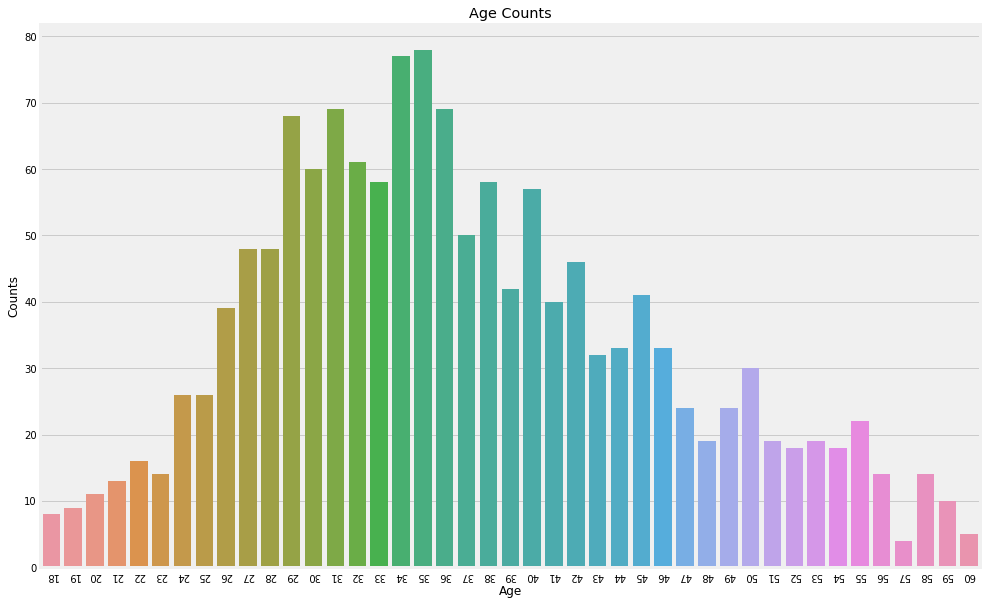

In [162]:
# showing the counts for different ages
plt.figure(figsize=(15,10))
ax=sns.barplot(x=age.Age,y=age.Count)
plt.xticks(rotation=180)
plt.xlabel("Age")
plt.ylabel("Counts")
plt.title("Age Counts")
plt.show()

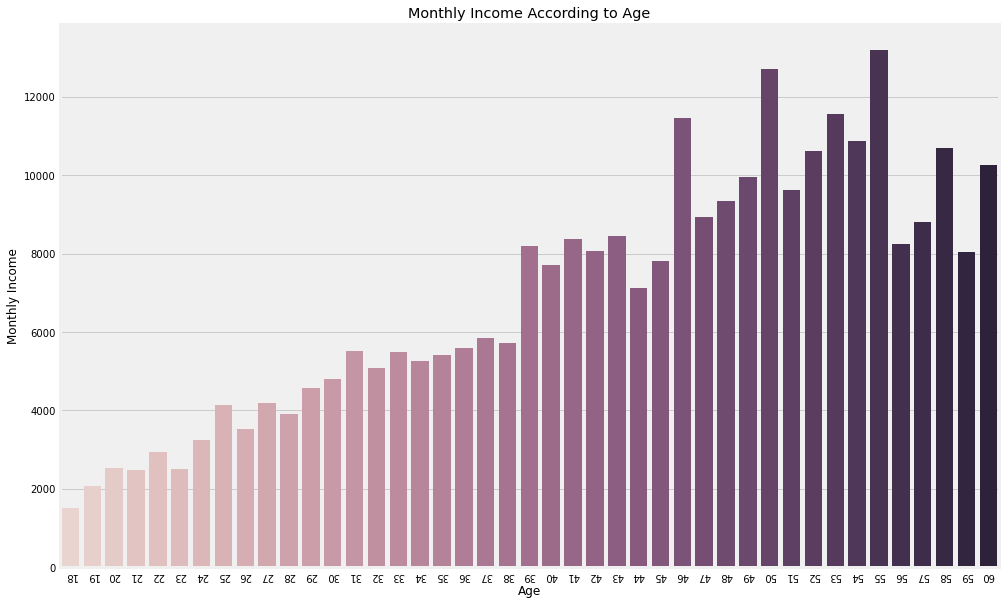

In [163]:
# showing monthly income according to age
plt.figure(figsize=(15,10))
ax=sns.barplot(x=age.Age,y=age.MonthlyIncome,palette = sns.cubehelix_palette(len(age.index)))
plt.xticks(rotation=180)
plt.xlabel("Age")
plt.ylabel("Monthly Income")
plt.title("Monthly Income According to Age")
plt.show()

In [164]:
# a dataframe with mean of the selected columns grouped by job role
jobrole=pd.DataFrame(data.groupby("JobRole")["PercentSalaryHike","YearsAtCompany","TotalWorkingYears","YearsInCurrentRole","WorkLifeBalance"].mean())
jobrole

,PercentSalaryHike,YearsAtCompany,TotalWorkingYears,YearsInCurrentRole,WorkLifeBalance
JobRole,,,,,
Healthcare Representative,15.450382,8.374046,14.068702,4.862595,2.702290
Human Resources,14.807692,5.326923,8.173077,3.134615,2.923077
Laboratory Technician,15.046332,5.019305,7.656371,3.200772,2.718147
Manager,15.137255,14.431373,24.549020,6.450980,2.774510
Manufacturing Director,15.593103,7.600000,12.786207,4.972414,2.765517
Research Director,14.950000,10.937500,21.400000,6.287500,2.862500
Research Scientist,15.448630,5.113014,7.715753,3.273973,2.678082
Sales Executive,14.889571,7.496933,11.101227,4.855828,2.803681
Sales Representative,15.674699,2.915663,4.674699,2.012048,2.891566


In [165]:
labels=data.EducationField.value_counts().index
labels

Index(['Life Sciences', 'Medical', 'Marketing', 'Technical Degree', 'Other',
       'Human Resources'],
      dtype='object')

In [166]:
colors=["cyan","orange","hotpink","green","navy","#9b59b6"]

In [167]:
sizes=data.EducationField.value_counts().values
sizes

array([606, 464, 159, 132,  82,  27], dtype=int64)

Text(0.5, 1.0, 'Education Field Counts')

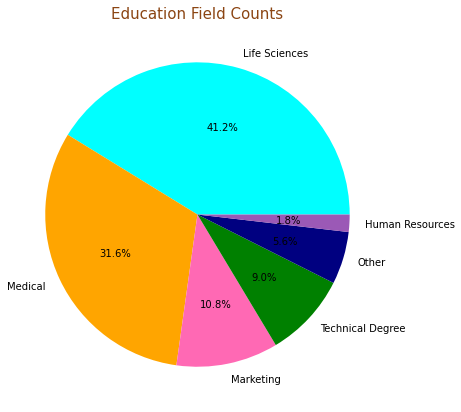

In [168]:
plt.figure(figsize=(7,7))
plt.pie(sizes,labels=labels,colors=colors,autopct="%1.1f%%")
plt.title("Education Field Counts",color="saddlebrown",fontsize=15)

In [169]:
# creating a dataframe called income based on the jobroles
income=pd.DataFrame(data.groupby("JobRole").MonthlyIncome.mean().sort_values(ascending=False))

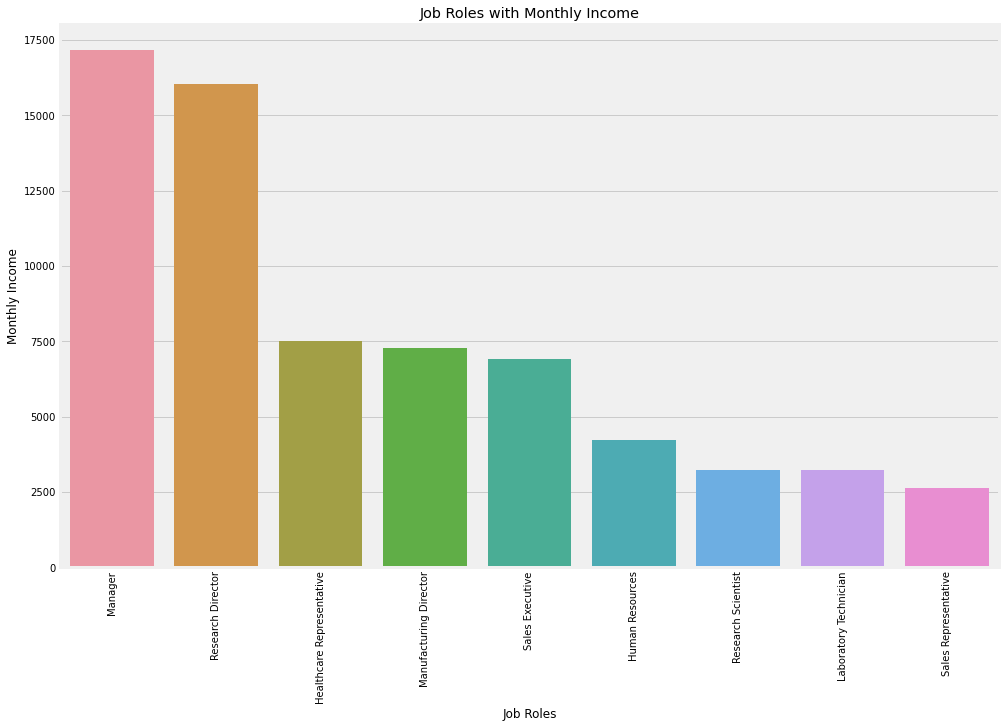

In [170]:
# showing the job roles with their monthly incomes
plt.figure(figsize=(15,10))
ax=sns.barplot(x=income.index,y=income.MonthlyIncome)
plt.xticks(rotation=90)
plt.xlabel("Job Roles")
plt.ylabel("Monthly Income")
plt.title("Job Roles with Monthly Income")
plt.show()

In [171]:
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [172]:
data.Age.describe()

count    1470.000000
mean       36.923810
std         9.135373
min        18.000000
25%        30.000000
50%        36.000000
75%        43.000000
max        60.000000
Name: Age, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x229c44e66d0>,
 'caps': [<matplotlib.lines.Line2D at 0x229c44e6c70>,
 'boxes': [<matplotlib.lines.Line2D at 0x229c44e6400>],
 'medians': [<matplotlib.lines.Line2D at 0x229c44f5250>],
 'fliers': [<matplotlib.lines.Line2D at 0x229c44f5520>],
 'means': []}

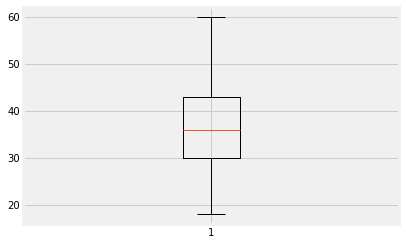

In [173]:
plt.boxplot(data.Age)

In [174]:
data.Age.isnull().sum()

0

<AxesSubplot:xlabel='Age', ylabel='count'>

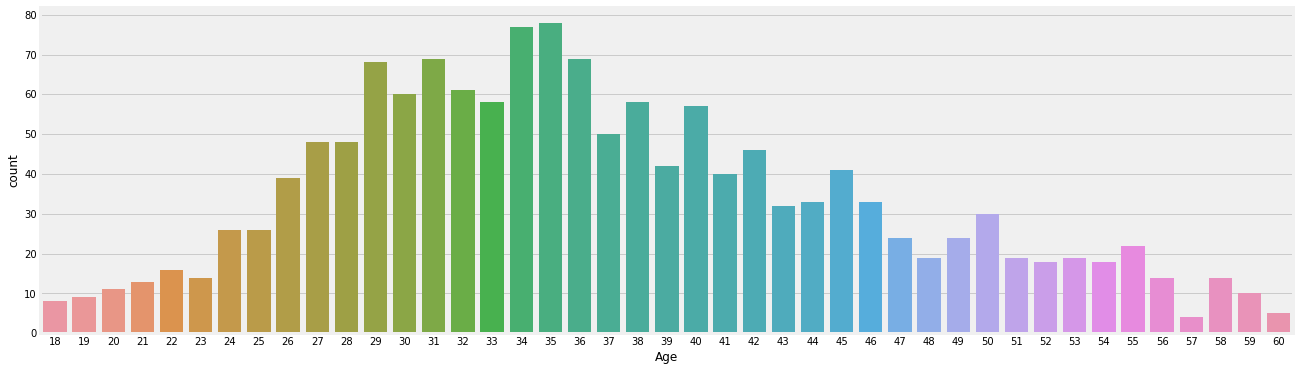

In [175]:
plt.figure(figsize=(20,6))
sns.countplot(x='Age',data=data)

In [176]:
data.Attrition.value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

<AxesSubplot:xlabel='EducationField', ylabel='count'>

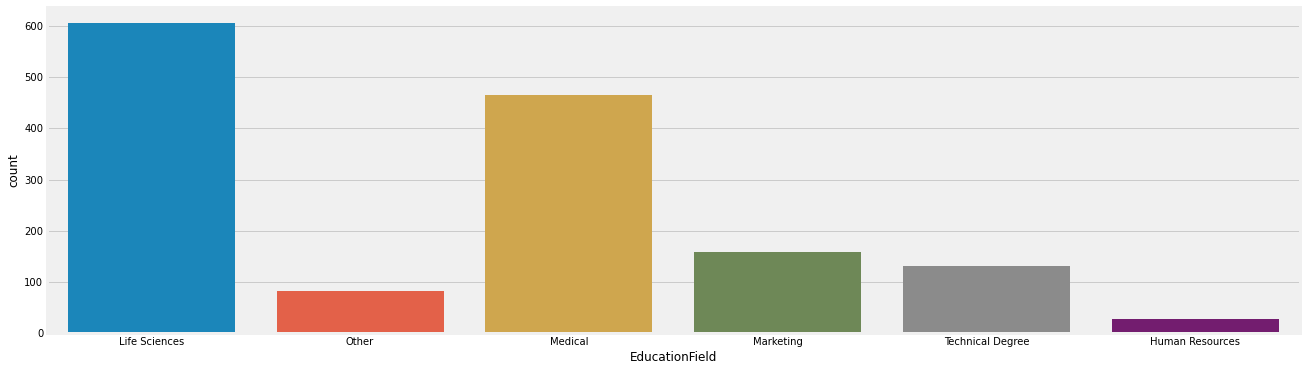

In [177]:
plt.figure(figsize=(20,6))
sns.countplot(x='EducationField',data=data)

In [178]:
data.JobRole.value_counts()

Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x229c46bf070>,
 'caps': [<matplotlib.lines.Line2D at 0x229c46bf640>,
 'boxes': [<matplotlib.lines.Line2D at 0x229c46aed60>],
 'medians': [<matplotlib.lines.Line2D at 0x229c46bfbe0>],
 'fliers': [<matplotlib.lines.Line2D at 0x229c46bfeb0>],
 'means': []}

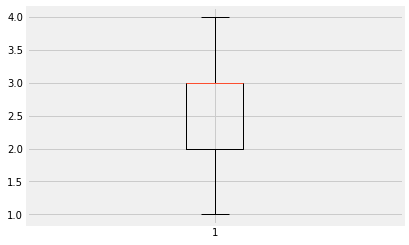

In [179]:
plt.boxplot(data.JobInvolvement)

In [180]:
data.DistanceFromHome.describe()

count    1470.000000
mean        9.192517
std         8.106864
min         1.000000
25%         2.000000
50%         7.000000
75%        14.000000
max        29.000000
Name: DistanceFromHome, dtype: float64

<AxesSubplot:xlabel='PerformanceRating', ylabel='count'>

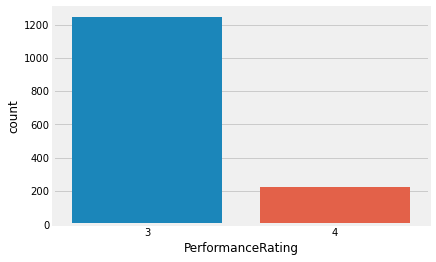

In [181]:
sns.countplot(data.PerformanceRating)

In [182]:
data.PerformanceRating=data.PerformanceRating.replace(["3","HIGH"],"3")
data.PerformanceRating=data.PerformanceRating.replace(["4","LOW"],"4")

<AxesSubplot:xlabel='PercentSalaryHike', ylabel='count'>

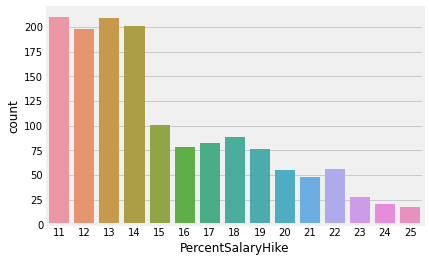

In [183]:
sns.countplot(data.PercentSalaryHike)

In [184]:
data.PercentSalaryHike.value_counts()

11    210
13    209
14    201
12    198
15    101
18     89
17     82
16     78
19     76
22     56
20     55
21     48
23     28
24     21
25     18
Name: PercentSalaryHike, dtype: int64

In [185]:
from sklearn.preprocessing import MinMaxScaler

In [186]:
dummy=pd.get_dummies(data)

In [187]:
dummy.shape

(1470, 57)

In [188]:
dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 57 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Age                                1470 non-null   int64
 1   DailyRate                          1470 non-null   int64
 2   DistanceFromHome                   1470 non-null   int64
 3   Education                          1470 non-null   int64
 4   EmployeeCount                      1470 non-null   int64
 5   EmployeeNumber                     1470 non-null   int64
 6   EnvironmentSatisfaction            1470 non-null   int64
 7   HourlyRate                         1470 non-null   int64
 8   JobInvolvement                     1470 non-null   int64
 9   JobLevel                           1470 non-null   int64
 10  JobSatisfaction                    1470 non-null   int64
 11  MonthlyIncome                      1470 non-null   int64
 12  MonthlyRate         

In [189]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [190]:
from sklearn.preprocessing import MinMaxScaler

In [191]:
scaler=MinMaxScaler()
print(scaler.fit(dummy))

MinMaxScaler()


In [192]:
scalerdata=scaler.transform(dummy)
print(scaler.transform(dummy))

[[0.54761905 0.71581961 0.         ... 0.         0.         1.        ]
 [0.73809524 0.12670007 0.25       ... 0.         1.         0.        ]
 [0.45238095 0.90980673 0.03571429 ... 0.         0.         1.        ]
 ...
 [0.21428571 0.03793844 0.10714286 ... 0.         0.         1.        ]
 [0.73809524 0.65926986 0.03571429 ... 0.         1.         0.        ]
 [0.38095238 0.37652112 0.25       ... 0.         1.         0.        ]]


In [193]:
from sklearn import preprocessing

In [194]:
X= pd.DataFrame(scalerdata)

In [195]:
X.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56
0,0.547619,0.715820,0.000000,0.25,0.0,0.000000,0.333333,0.914286,0.666667,0.25,1.000000,0.262454,0.698053,0.888889,0.000000,0.0,0.000000,0.0,0.000000,0.200,0.0,0.000000,0.15,0.222222,0.000000,0.294118,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.738095,0.126700,0.250000,0.00,0.0,0.000484,0.666667,0.442857,0.333333,0.25,0.333333,0.217009,0.916001,0.111111,0.857143,1.0,1.000000,0.0,0.333333,0.250,0.5,0.666667,0.25,0.388889,0.066667,0.411765,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.452381,0.909807,0.035714,0.25,0.0,0.001451,1.000000,0.885714,0.333333,0.00,0.666667,0.056925,0.012126,0.666667,0.285714,0.0,0.333333,0.0,0.000000,0.175,0.5,0.666667,0.00,0.000000,0.000000,0.000000,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.357143,0.923407,0.071429,0.75,0.0,0.001935,1.000000,0.371429,0.666667,0.00,0.666667,0.100053,0.845814,0.111111,0.000000,0.0,0.666667,0.0,0.000000,0.200,0.5,0.666667,0.20,0.388889,0.200000,0.000000,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.214286,0.350036,0.035714,0.00,0.0,0.002903,0.000000,0.142857,0.666667,0.00,0.333333,0.129489,0.583738,1.000000,0.071429,0.0,1.000000,0.0,0.333333,0.150,0.5,0.666667,0.05,0.111111,0.133333,0.117647,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [196]:
X.shape

(1470, 57)

In [197]:
X.tail()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56
1465,0.428571,0.559771,0.785714,0.25,0.0,0.996613,0.666667,0.157143,1.000000,0.25,1.000000,0.082254,0.409396,0.444444,0.428571,0.0,0.666667,0.0,0.333333,0.425,0.500000,0.666667,0.125,0.111111,0.000000,0.176471,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1466,0.500000,0.365784,0.178571,0.00,0.0,0.997097,1.000000,0.171429,0.333333,0.50,0.000000,0.472986,0.777474,0.444444,0.285714,0.0,0.000000,0.0,0.333333,0.225,0.833333,0.666667,0.175,0.388889,0.066667,0.411765,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1467,0.214286,0.037938,0.107143,0.50,0.0,0.998065,0.333333,0.814286,1.000000,0.25,0.333333,0.270300,0.123670,0.111111,0.642857,1.0,0.333333,0.0,0.333333,0.150,0.000000,0.666667,0.150,0.111111,0.000000,0.176471,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1468,0.738095,0.659270,0.035714,0.50,0.0,0.998549,1.000000,0.471429,0.333333,0.25,0.333333,0.230700,0.447661,0.222222,0.214286,0.0,1.000000,0.0,0.000000,0.425,0.500000,0.333333,0.225,0.333333,0.000000,0.470588,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1469,0.380952,0.376521,0.250000,0.50,0.0,1.000000,0.333333,0.742857,1.000000,0.25,0.666667,0.178778,0.326601,0.222222,0.071429,0.0,0.000000,0.0,0.000000,0.150,0.500000,1.000000,0.100,0.166667,0.066667,0.117647,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [198]:
x=X.iloc[:8523]
Test=X.iloc[8523:]

In [199]:
x=data.iloc[:,2:3].values
y=data.iloc[:,3:4].values

In [200]:
from sklearn import datasets
from sklearn.model_selection import cross_val_score 

In [201]:
from sklearn.model_selection import train_test_split

In [202]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=1/4,random_state=0)

<h2> For numerical columns doing univarinat analysis

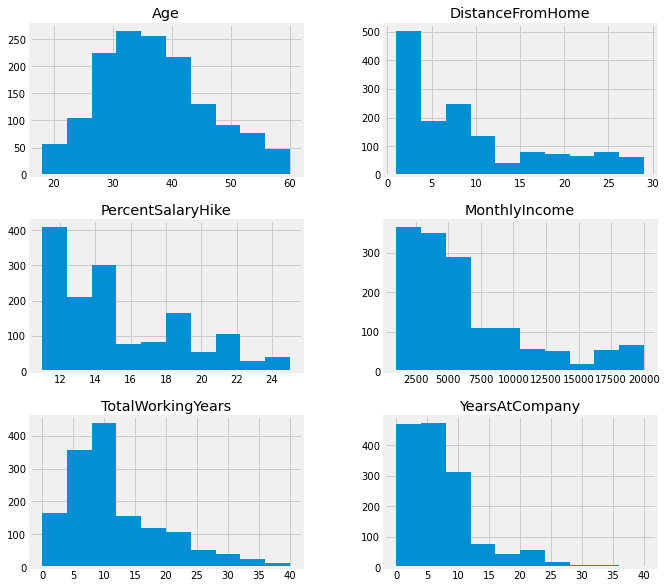

In [203]:
columns=data.columns.tolist()
num_col_eda=['Age','DistanceFromHome','PercentSalaryHike','MonthlyIncome','TotalWorkingYears','YearsAtCompany']
data[num_col_eda].hist(figsize=(10,10))
plt.show()

<h1>Finding Outlier in Numerical Data

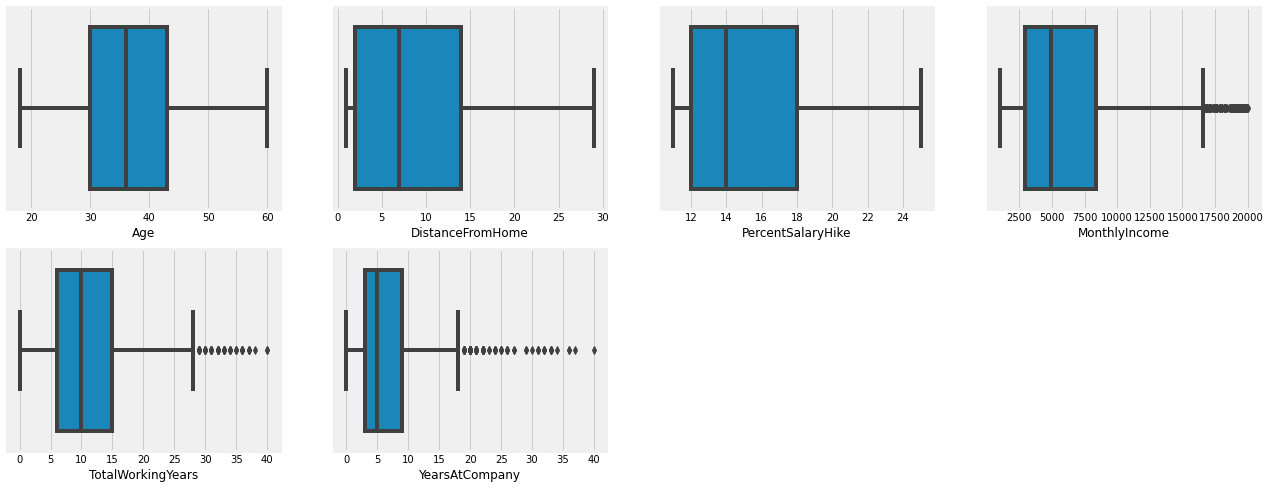

In [204]:
#Box Plot for finding "Outiler" in our data
fig = plt.figure(figsize=(20,26))
for idx,i in enumerate(num_col_eda):
    ax=plt.subplot(6,4,idx+1)
    sns.boxplot(x=i,data=data,ax=ax)

In [205]:
#lambda x: x*10 if x<2 else (x**2 if x<4 else x+10)
#data['age_fs']=data['Age'].map(lambda x: "20" if(x<30) else ("30" if(30<=x<40) else ("40" if(40<=x<50) else "50")))
data['age_fs1']=data['Age'].map(lambda x: "20-40" if(x<40) else "40-60")
#sns.FacetGrid(data,hue="Attrition",size=3).map(sns.distplot,'age_fs').add_legend()
#plt.show()
#sns.FacetGrid(data,hue="Attrition",size=3).map(sns.distplot,'Age').add_legend()

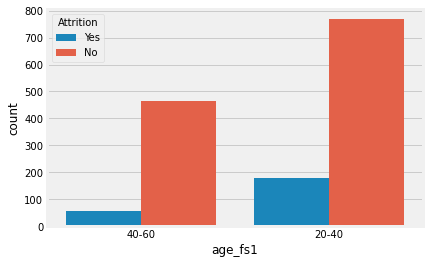

In [206]:
sns.countplot(data["age_fs1"],hue=data['Attrition'])
plt.show()

<h2>Linear Regression </h2>

In [207]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(train_x,train_y)

LinearRegression()

In [208]:
#predict the test result
y_pred=regressor.predict(test_x)

<h1> Decision Tree Regressor </h1>

In [209]:
from sklearn.tree import DecisionTreeRegressor

In [210]:
model1=DecisionTreeRegressor().fit(train_x,train_y)
print("Train Score =",model1.score(train_x,train_y))
print("Test Score =",model1.score(test_x,test_y))
predict_y=model1.predict(test_x)

Train Score = 1.0
Test Score = -0.5978260869565217


In [211]:
from sklearn.metrics import mean_squared_error
mean_squared_error(test_y,predict_y,squared=False)

0.45922146480918835

<h1> RandamForest Regressor </h1>

In [212]:
from sklearn.ensemble import RandomForestRegressor
model2=RandomForestRegressor(n_estimators = 100, random_state = 0)
model2.fit(train_x, train_y)

RandomForestRegressor(random_state=0)

In [213]:
model2.score(train_x,train_y)

0.8874694235522365

In [214]:
model2.score(test_x,test_y)

0.2238997896213184

In [215]:
predic_y=model2.predict(test_x)

In [216]:
from sklearn.metrics import mean_squared_error
mean_squared_error(test_y,predic_y,squared=False)

0.32004889082295973

<h1> KNN Algorithm

In [217]:
from sklearn.neighbors import KNeighborsClassifier

In [218]:
knn= KNeighborsClassifier(n_neighbors=3)
knn.fit(train_x,train_y)

KNeighborsClassifier(n_neighbors=3)

In [219]:
y_pred= knn.predict(test_x)
print("Accuracy Score: ",metrics.accuracy_score(y_pred,test_y))

Accuracy Score:  0.8163265306122449


In [220]:
cm= confusion_matrix(test_y,y_pred)
print("Confusion Matrix: ",cm,sep='\n')

Confusion Matrix: 
[[234  14]
 [ 40   6]]


In [221]:
fpr,tpr,threshold= metrics.roc_curve(test_y,y_pred)  
roc_auc= metrics.auc(fpr,tpr)
print("Area under the curve: ",roc_auc)

Area under the curve:  0.5369915848527349


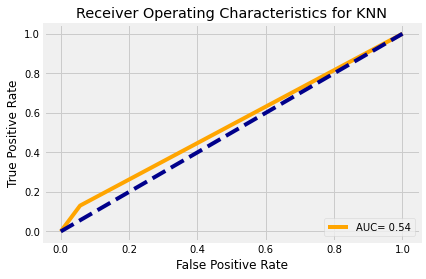

In [222]:
plt.title("Receiver Operating Characteristics for KNN")
plt.plot(fpr,tpr,'orange',label= "AUC= %0.2f" % roc_auc)
plt.legend(loc= 'lower right')
plt.plot([0,1],[0,1],color='darkblue',linestyle='--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

<h1> Gradient Boositing </h1>

In [223]:
from sklearn.ensemble import GradientBoostingRegressor

In [224]:
model3=GradientBoostingRegressor(n_estimators = 100, random_state = 0)
model3.fit(train_x, train_y)

GradientBoostingRegressor(random_state=0)

In [225]:
model3.score(train_x,train_y)

0.6264245008714093

In [226]:
model3.score(test_x,test_y)

0.29880307163796216

In [227]:
pre_y=model3.predict(test_x)

In [228]:
from sklearn.ensemble import GradientBoostingClassifier

In [229]:
from sklearn.metrics import mean_squared_error
mean_squared_error(test_y,pre_y,squared=False)

0.3042127614274347

<h1> AdaBoosting </h1>

In [230]:
from sklearn.ensemble import AdaBoostRegressor
regress=AdaBoostRegressor(random_state=0, n_estimators=100)
regress.fit(train_x, train_y)

AdaBoostRegressor(n_estimators=100, random_state=0)

In [231]:
regress.score(train_x,train_y)

0.20562152872537687

In [232]:
regress.score(test_x,test_y)

0.08680541846891177

In [233]:
prdic_y=regress.predict(test_x)

In [234]:
from sklearn.metrics import mean_squared_error
mean_squared_error(test_y,prdic_y,squared=False)

0.3471675213980677

In [ ]:
data = str(input())
manual_testing(data)

In [ ]:
from sklearn.feature_extraction.text import TfidVectorizer

In [ ]:
vectorization = TfidVectorizer()
xv_train = vectorization.fit_transform(x+train)
xv_test = vectorization.transform(x_test)

In [ ]:
from sklearn.naive_bayes import MultinomialNB

In [ ]:
mnb= MultinomialNB()
mnb=mnb.fit(train_x,train_y)

In [ ]:
y_pred= mnb.predict(test_x)

print("Accuracy Percentage: ",mnb.score(test_x,test_y)*100)

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
cm= confusion_matrix(test_y,y_pred)
print("Confusion Matrix: ",cm,sep='\n')

In [ ]:
from sklearn import metrics

In [ ]:
fpr,tpr,threshold= metrics.roc_curve(test_y,y_pred)  
roc_auc= metrics.auc(fpr,tpr)
print("Area under the curve: ",roc_auc)

In [ ]:
plt.title("Receiver Operating Characteristics for Naive Bayes Algorithm")
plt.plot(fpr,tpr,'orange',label= "AUC= %0.2f" % roc_auc)
plt.legend(loc= 'lower right')
plt.plot([0,1],[0,1],color='darkblue',linestyle='--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()